## Complex Digital Down Conversion (DDC)

In [17]:
import ddc_lutgen
import matplotlib 
import matplotlib.pyplot as plt
import ipympl
import numpy as np
from scipy.fft import fft, fftshift, fftfreq

#matplotlib.use('ipympl')
#matplotlib.use('inline')
#%matplotlib notebook
#matplotlib.use('AGG')
print(matplotlib.get_backend())

module://ipympl.backend_nbagg


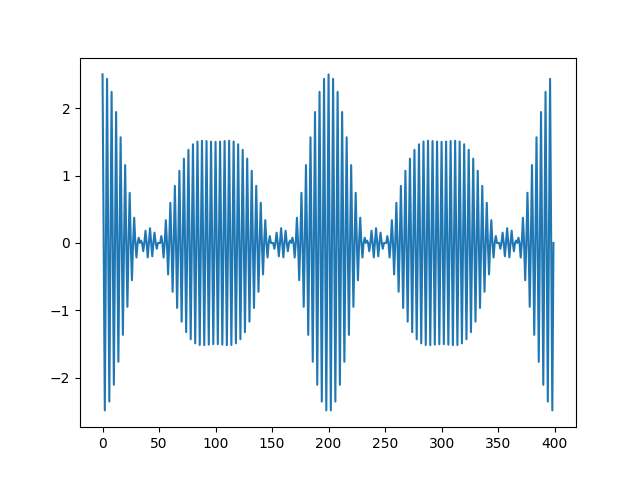

In [18]:
# generate 400 samples of a 1 MHz CW tone
FS = 4e6
fa_xin = 1e6
BUF_LEN = 400
FFT_LEN = BUF_LEN
n = np.arange(0, BUF_LEN, 1)
xin = np.cos((2 * np.pi * fa_xin / FS) * n) * (1 + np.cos(2 * np.pi * 0.01 * n) + 0.5 * np.cos(2*np.pi*0.015*n))
plt.plot(n, xin)
plt.show()

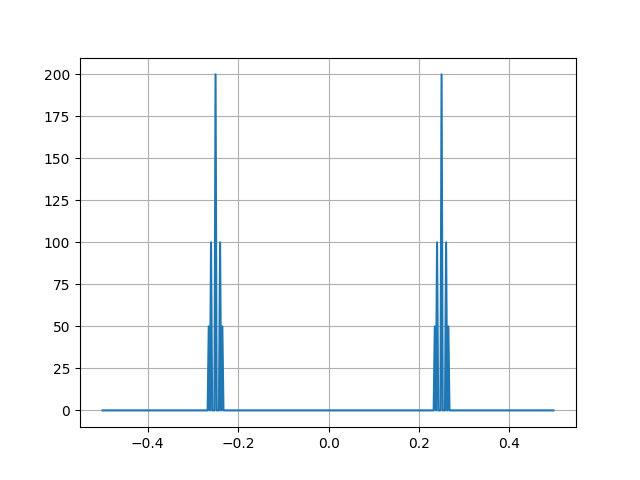

In [19]:
hf_xin = fft(xin)
hfabs_xin = abs(hf_xin)
plt.plot(np.arange(-0.5, 0.5, 1 / 400), hfabs_xin)
plt.grid()
plt.show()

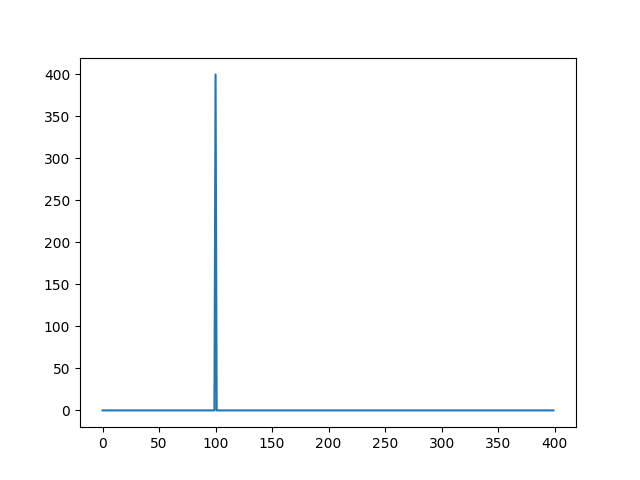

In [20]:
# I/Q Mixing
fa_lo = 1e6
fd_lo = fa_lo/ FS

lo_i = np.cos(2 * np.pi * fd_lo * n)
lo_q = np.sin(2 * np.pi * fd_lo * n)

lo_iq = lo_i + (lo_q * 1j)
bb_i = lo_i * xin
bb_q = lo_q * xin
#bb_q = lo_q * 0
bb = bb_i + (1j * bb_q)
fd_lo

plt.plot(abs(fft(lo_iq)))
plt.show()

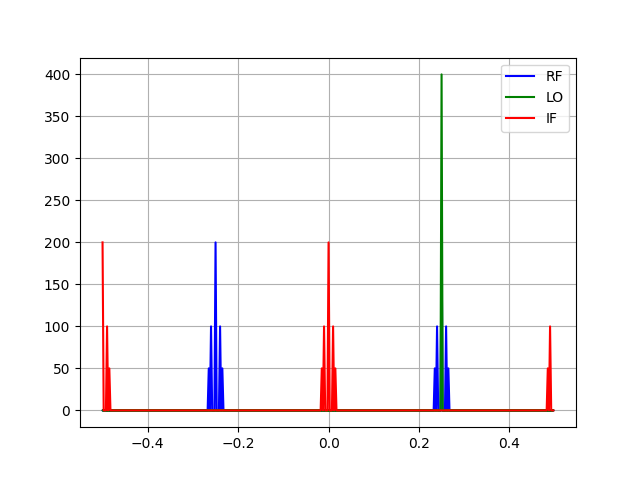

In [21]:
hf_bb = fft(bb)
hfabs_bb = abs(hf_bb)
hfang_bb = np.angle(hf_bb)
fd = fftfreq(BUF_LEN)
plt.plot(fd, hfabs_xin, 'b', label="RF")
plt.plot(fd, abs(fft(lo_iq)), 'g', label="LO")
plt.plot(fftshift(fd), fftshift(hfabs_bb), 'r', label="IF")
#plt.plot(fd, hfabs_bb)
plt.legend()
plt.grid()
plt.show()

In [22]:
bb


array([ 2.50000000e+00+0.00000000e+00j,  9.35778007e-33+1.52824146e-16j,
        2.48325833e+00-3.04111436e-16j,  8.30938415e-32+4.52341805e-16j,
        2.43347140e+00-5.96028593e-16j,  2.24641498e-31+7.33734815e-16j,
        2.35194045e+00-8.64088903e-16j,  4.22539784e-31+9.85799765e-16j,
        2.24079099e+00-1.09767101e-15j,  6.60545547e-31+1.19861416e-15j,
        2.10290962e+00-1.28766077e-15j,  1.21543989e-29+4.96115615e-15j,
        1.94185827e+00-1.42685431e-15j,  1.78172364e-30-1.81746144e-15j,
        1.76176893e+00-1.51028128e-15j,  1.20987984e-29+4.48961337e-15j,
        1.56722205e+00-1.53543478e-15j,  7.92873434e-31-1.07814227e-15j,
        1.36311267e+00-1.50239842e-15j,  1.08810569e-29+3.70132767e-15j,
        1.15450850e+00-1.41386514e-15j,  2.52624685e-31-5.15058452e-16j,
        9.46504478e-01-4.63770645e-15j,  8.56307357e-30+2.68881584e-15j,
        7.44078525e-01-1.09348006e-15j,  3.89768438e-32-1.58733892e-16j,
        5.51952859e-01+1.08219898e-15j,  5.42393661